## &#x1F4D1; &nbsp; Zillow’s Home Value Prediction (Zestimate)

<h1 class='font-effect-3d' style='color:#ff355e; font-family:Akronim;'> Python Modules, Styling, Helpful Functions, and Links</h1>

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Akronim|Roboto&effect=3d|fire-animation');
a,h2 {color:#ff355e; font-family:Roboto;} 
span {color:black; font-family:Roboto; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#ff355e;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}       
</style>

In [2]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd,numpy as np,os,sqlite3
import seaborn as sn,pylab as pl
import keras as ks,tensorflow as tf
pl.style.use('seaborn-whitegrid')
np.set_printoptions(precision=8)

Using TensorFlow backend.


<h1 class='font-effect-3d' style='color:#ff355e; font-family:Akronim;'>Data</h1>

In [3]:
train_2016=pd.read_csv("../input/train_2016_v2.csv",
                       parse_dates=["transactiondate"])
properties_2016=pd.read_csv("../input/properties_2016.csv")
train_2017=pd.read_csv("../input/train_2017.csv",
                       parse_dates=["transactiondate"])
properties_2017=pd.read_csv("../input/properties_2017.csv")

In [4]:
train_2016.describe(),train_2017.describe()

(           parcelid      logerror
 count  9.027500e+04  90275.000000
 mean   1.298466e+07      0.011457
 std    2.504510e+06      0.161079
 min    1.071174e+07     -4.605000
 25%    1.155950e+07     -0.025300
 50%    1.254734e+07      0.006000
 75%    1.422755e+07      0.039200
 max    1.629608e+08      4.737000,
            parcelid      logerror
 count  7.761300e+04  77613.000000
 mean   1.300781e+07      0.016755
 std    3.518717e+06      0.170887
 min    1.071186e+07     -4.655420
 25%    1.153821e+07     -0.024325
 50%    1.253004e+07      0.006670
 75%    1.421101e+07      0.039295
 max    1.676893e+08      5.262999)

In [5]:
properties_2016.head().T

,0,1,2,3,4
parcelid,10754147,10759547,10843547,10859147,10879947
airconditioningtypeid,NaN,NaN,NaN,NaN,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,0,0,0,0,0
bedroomcnt,0,0,0,0,0
buildingclasstypeid,NaN,NaN,NaN,3,4
buildingqualitytypeid,NaN,NaN,NaN,7,NaN
calculatedbathnbr,NaN,NaN,NaN,NaN,NaN
decktypeid,NaN,NaN,NaN,NaN,NaN


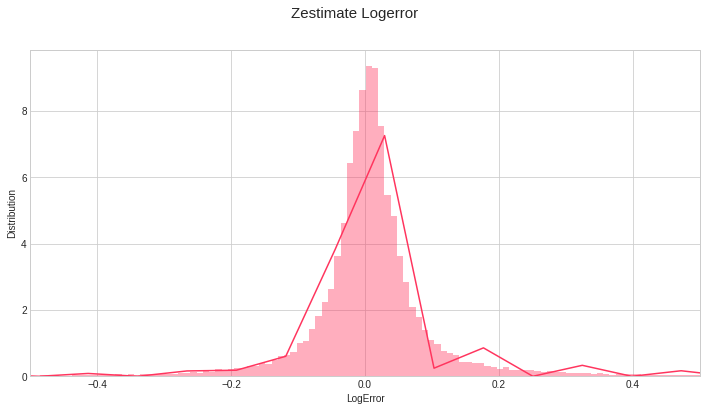

In [6]:
pl.figure(1,figsize=(12,6))
sn.distplot(train_2016['logerror'],
            color='#ff355e',bins=1000)
pl.ylabel("Distribution")
pl.xlabel("LogError"); pl.xlim(-.5,.5)
pl.suptitle('Zestimate Logerror',fontsize=15);


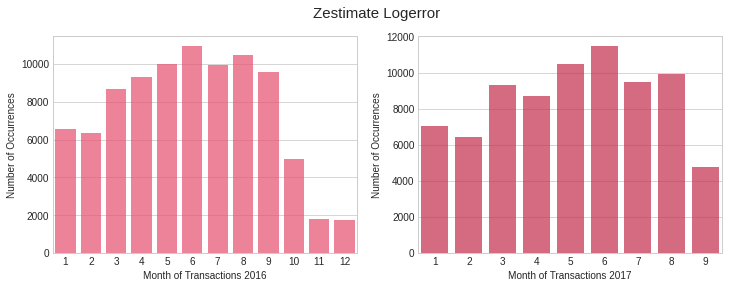

In [7]:
data2016=train_2016['transactiondate'].dt.month.value_counts()
data2017=train_2017['transactiondate'].dt.month.value_counts()
pl.figure(1,figsize=(12,4)); pl.subplot(121)
sn.barplot(data2016.index,data2016.values,color='#ff355e',alpha=.7)
pl.ylabel("Number of Occurrences")
pl.xlabel("Month of Transactions 2016")
pl.subplot(122)
sn.barplot(data2017.index,data2017.values,color='crimson',alpha=.7)
pl.ylabel("Number of Occurrences")
pl.xlabel("Month of Transactions 2017")
pl.suptitle('Zestimate Logerror',fontsize=15);

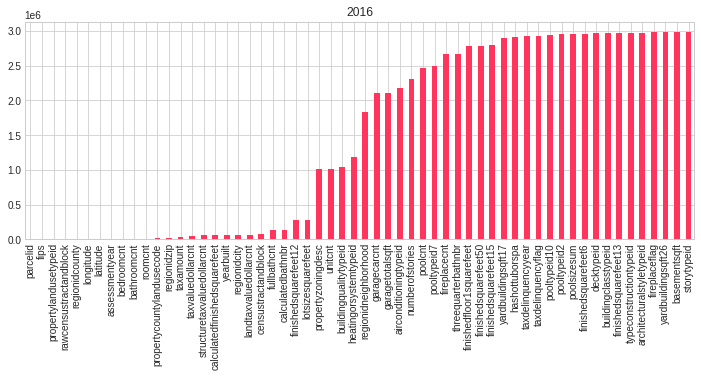

In [8]:
properties_2016.isnull().sum(axis=0).sort_values()\
.plot(kind='bar',figsize=(12,4),color='#ff355e',title='2016');

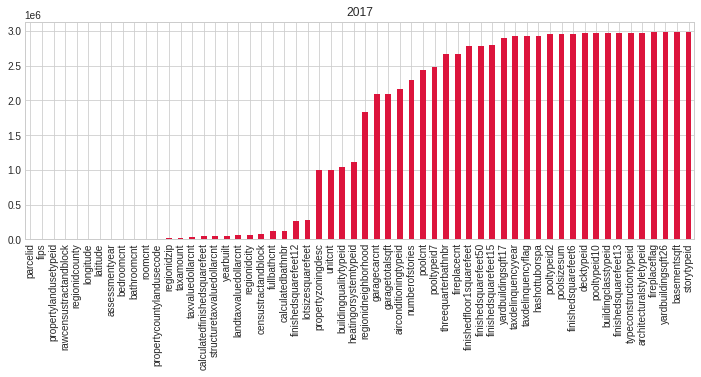

In [9]:
properties_2017.isnull().sum(axis=0).sort_values()\
.plot(kind='bar',figsize=(12,4),color='crimson',title='2017');

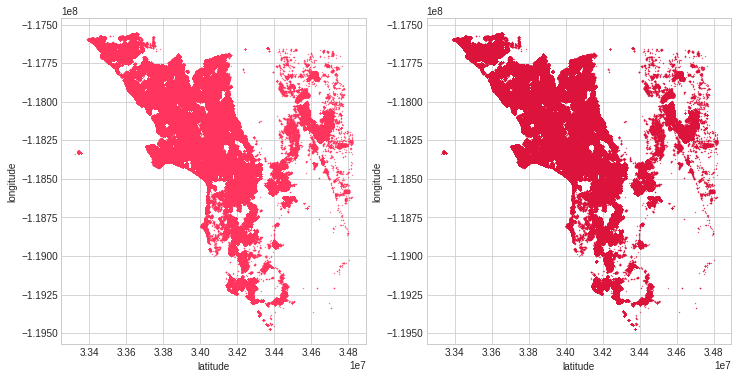

In [10]:
fig,ax=pl.subplots(ncols=2,nrows=1,figsize=(12,6))
properties_2016.plot(kind='scatter',ax=ax[0],
                     x='latitude',y='longitude',
                     color='#ff355e',s=.1)
properties_2017.plot(kind='scatter',ax=ax[1],
                     x='latitude',y='longitude',
                     color='crimson',s=.1);